## 11.2 - Polynomial of order 3


In [1]:
#libraries
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

2025-01-03 14:42:34.557696: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-03 14:42:34.576723: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 14:42:34.727523: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-03 14:42:34.853059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735911754.957397  399501 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735911754.99

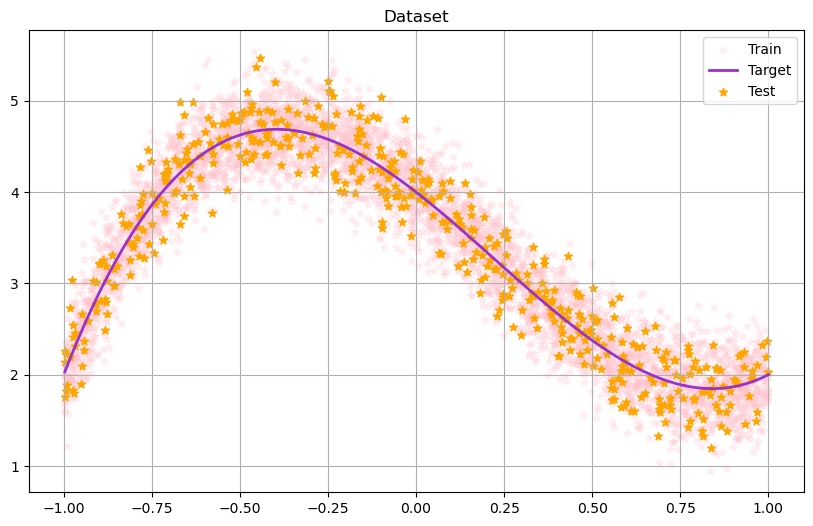

In [2]:
n_valid=500
n_train=10*n_valid
n_epochs=80
sigma=0.3

#parameters
a = 3
b = -2
c = -3
d = 4

# generate training and test inputs
np.random.seed(0)

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target = f(x_valid, a, b, c, d)

y_train = np.random.normal(f(x_train, a, b, c, d), sigma) 
y_valid = np.random.normal(f(x_valid, a, b, c, d), sigma)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='pink', marker='*', alpha=0.2, label='Train')
plt.plot(x_valid, y_target, color='darkorchid', label="Target", linewidth='2')
plt.scatter(x_valid, y_valid, color='orange', marker='*', label='Test')
plt.title("Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
'''import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

# Compose the NN model
model = Sequential()
model.add(Dense(200,input_shape=(1,),activation='relu'))
model.add(Dense(1,activation='relu'))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Summary of our composed model
model.summary()'''

"import tensorflow as tf\nfrom tensorflow.keras.layers import Dense, Input\n\n# Compose the NN model\nmodel = Sequential()\nmodel.add(Dense(200,input_shape=(1,),activation='relu'))\nmodel.add(Dense(1,activation='relu'))\n\n# Compile the model choosing optimizer, loss and metrics objects\nmodel.compile(optimizer='adam', loss='mse', metrics=['mse'])\n\n# Summary of our composed model\nmodel.summary()"

In [38]:
#now, we create the model
model = Sequential()
model.add(Dense(100,input_shape=(1,),activation='relu'))
model.add(Dense(1,activation='relu'))


# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

/home/fefe/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#now we train the model
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# evaluate model - with validation data
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with validation data---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model - with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with the exact curve---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7144 - mse: 3.7144 - val_loss: 0.5789 - val_mse: 0.5789
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5421 - mse: 0.5421 - val_loss: 0.5003 - val_mse: 0.5003
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4616 - mse: 0.4616 - val_loss: 0.4176 - val_mse: 0.4176
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3729 - mse: 0.3729 - val_loss: 0.3503 - val_mse: 0.3503
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3024 - mse: 0.3024 - val_loss: 0.2892 - val_mse: 0.2892
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2548 - mse: 0.2548 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 0.2147 - val_mse: 0.2147
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1895 - mse: 0.1895 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 9/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [40]:
'''# return weights and biases
#par = model.get_weights() #m, b
#print('------PARAMETERS------\n',par,'\n')'''

"# return weights and biases\n#par = model.get_weights() #m, b\n#print('------PARAMETERS------\n',par,'\n')"

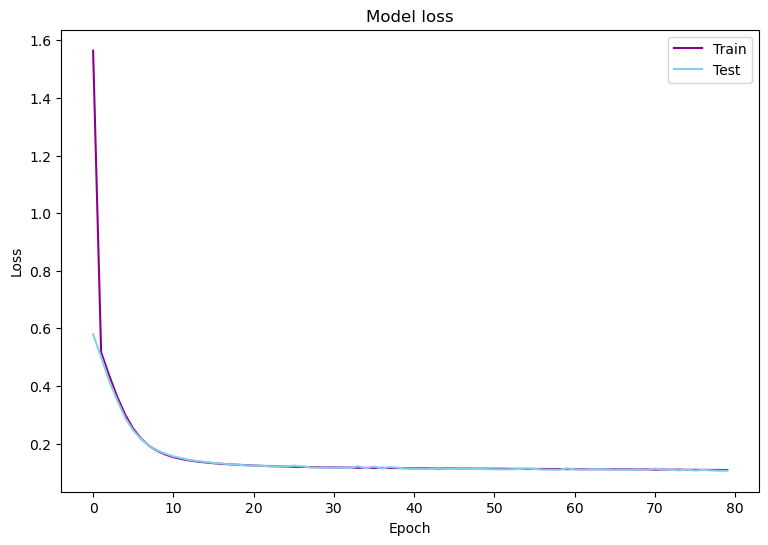

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


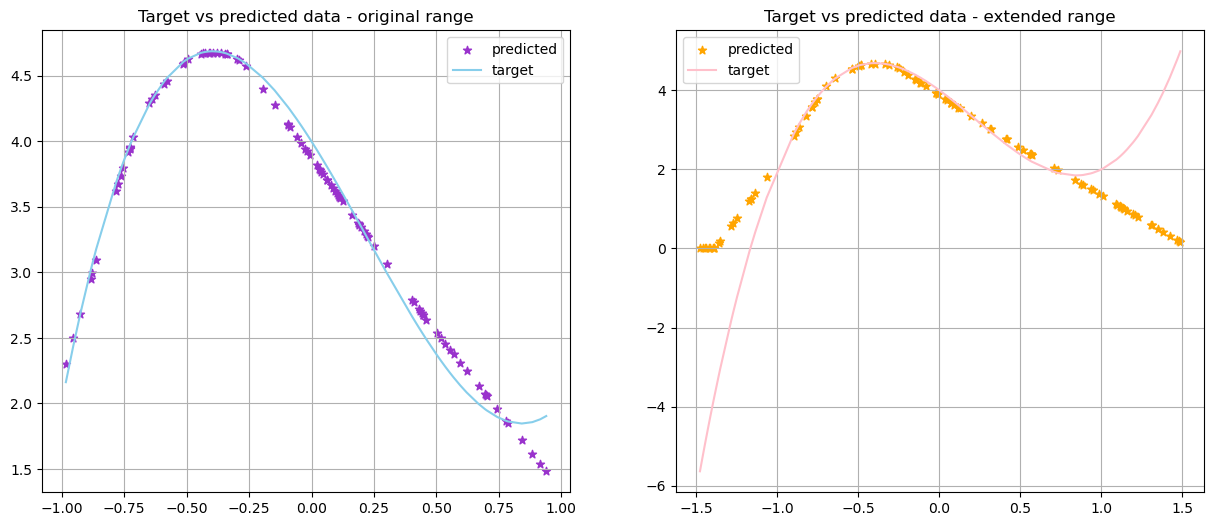

In [41]:
# Plot training & validation loss values over time
plt.figure(figsize=(9,6))
plt.title('Loss function over time')
plt.plot(history.history['loss'], color='darkmagenta')
plt.plot(history.history['val_loss'], color='skyblue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#make predictions
x_predicted = np.random.uniform(-1., 1., 100)
x_predicted_ext = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
x_predicted_ext.sort()
y_predicted = model.predict(x_predicted)
y_predicted_ext = model.predict(x_predicted_ext)

#print prediction vs target
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Target vs predicted data - original range')
plt.scatter(x_predicted, y_predicted,color='darkorchid', marker='*',label='predicted')
plt.plot(x_predicted, f(x_predicted,a,b,c,d), color='skyblue',label='target')
plt.grid(True)
plt.legend()
plt.subplot(122)
plt.title('Target vs predicted data - extended range')
plt.scatter(x_predicted_ext, y_predicted_ext,color='orange',  marker='*',label='predicted')
plt.plot(x_predicted_ext, f(x_predicted_ext,a,b,c,d), color='pink',label='target')
plt.grid(True)
plt.legend()
plt.show()